# tj_articles

author: Tatiana Rijoff
date: 11/01/2022
tj_articles allows a basic search of articles in pubmed using a combination of keywords '''

In [1]:
import pandas as pd
import os
import shutil
import glob

from tj_articles_analysis import Keywords
from tj_articles_analysis import PubMedExtraction
from tj_articles_analysis import TjArticlesAnalysis

## Prepare the environment

In [2]:
base_dir = 'project001/'
input_dir = base_dir  + 'input/'
output_dir = base_dir  + 'output/'
if not os.path.isdir(output_dir):
    os.mkdir(output_dir)
working_dir = base_dir + 'tmp/'
if not os.path.isdir(working_dir):
    os.mkdir(working_dir)
keys_dir = output_dir + 'keys/'
if not os.path.isdir(keys_dir):
    os.mkdir(keys_dir)
pubmed_dir = working_dir + 'pubmed/'
if not os.path.isdir(pubmed_dir):
    os.mkdir(pubmed_dir)
xml_dir = working_dir + 'xml/'
if not os.path.isdir(xml_dir):
    os.mkdir(xml_dir)
abstract_dir = working_dir + 'abstracts/'
if not os.path.isdir(abstract_dir):
    os.mkdir(abstract_dir)
latex_dir = working_dir + 'latex/'
if not os.path.isdir(latex_dir):
    os.mkdir(latex_dir)
pdf_dir = output_dir + 'pdf/'
if not os.path.isdir(pdf_dir):
    os.mkdir(pdf_dir)
img_dir = output_dir + 'img/'
if not os.path.isdir(img_dir):
    os.mkdir(img_dir)

In [3]:
country_df = pd.read_excel(input_dir + 'country_dict.xlsx')

## Keywords

In [4]:
key_list = Keywords()

### Load an already created list of keywords

In [5]:
key_list.load_keywords_list(keys_dir + 'keywords_list.xlsx')

### add data from other keys and save all the results in the excel

In [6]:
# default when the keywords is more than one word the sentence is between quote ' '
# key_list.find_keys_from_excel(input_dir + 'keywords.xlsx', 'TwoColumns')

# mod2 from the second column the keywords are not in quotes (this means 
# that publmed will consider an AND between the words )
key_list.find_keys_from_excel_mod2(input_dir + 'keywords.xlsx', 'TwoColumns')

# mod3 for all the columns the keywords are not in quotes (this means 
# that publmed will consider an AND between the words )
# key_list.find_keys_from_excel(input_dir + 'keywords.xlsx', 'TwoColumns')

key_list.save_keywords_list(keys_dir + 'keywords_list.xlsx')

## Pubmed

In [7]:
pub_engine = PubMedExtraction()

### Load the information from a pre-saved file

In [8]:
pub_engine.load_pubmed_idlist(pubmed_dir + 'id_list.txt')
key_list.load_articles(keys_dir + 'articles_found.xlsx')

### Add data from the other key and save all the results in the excel

In [9]:
pub_engine.load_pubmed_from_key(key_list)
pub_engine.save_pubmed_idlist(pubmed_dir + 'id_list.txt')
key_list.save_keywords(keys_dir + 'keywords_list.xlsx')
key_list.save_articles(keys_dir + 'articles_found.xlsx')

Articles found with "Chronic disease" AND Patient Journey: 142
Articles found with "Metabolic disease" AND Patient Journey: 2
Articles found with "Congenital disease" AND Patient Journey: 0
Articles found with "Rare disease" AND Patient Journey: 33
Articles found with "Chronic disease" AND Patient Journey: 142
Articles found with "Metabolic disease" AND Patient Journey: 2
Articles found with "Congenital disease" AND Patient Journey: 0
Articles found with "Rare disease" AND Patient Journey: 33
project001/tmp/pubmed/id_list.txt


### Load xml for each article

In [10]:
pub_engine.find_info_xml(xml_dir)

Data for 23115588 already collected
Data for 2260021 already collected
Data for 27286498 already collected
Data for 24828245 already collected
Data for 17679571 already collected
Data for 34951091 already collected
Data for 33926503 already collected
Data for 28034320 already collected
Data for 27536552 already collected
Data for 33431233 already collected
Data for 33651826 already collected
Data for 18822668 already collected
Data for 31362945 already collected
Data for 34413639 already collected
Data for 22618921 already collected
Data for 15312263 already collected
Data for 30938605 already collected
Data for 28241879 already collected
Data for 35031060 already collected
Data for 34593293 already collected
Data for 17505332 already collected
Data for 18945637 already collected
Data for 18202706 already collected
Data for 15154988 already collected
Data for 18980507 already collected
Data for 33864899 already collected
Data for 17386311 already collected
Data for 26604280 already col

## Article analysis

In [11]:
my_analysis = TjArticlesAnalysis(country_df, abstract_dir)

### Load the information a presaved file

In [12]:
my_analysis.load_data_analysis(output_dir + 'info_extraction.xlsx')

### find information for the articles

In [13]:
for article_id in pub_engine.idlist:
    my_analysis.collect_pubmed_data(xml_dir, article_id, key_list)
print("save information in ", (output_dir + 'info_extraction.xlsx'))
my_analysis.save_data_analysis(output_dir + 'info_extraction.xlsx')
print("save information in ", (output_dir + 'revision_articles.xlsx'))
# ~ the revision excel is specific for the project and the code must be customized by user
my_analysis.save_for_review(output_dir + 'revision_articles.xlsx')

"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Rare disease" AND Patient Journey; "Rare disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Metabolic disease" AND Patient Journey; "Metabolic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"

"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Rare disease" AND Patient Journey; "Rare disease" AND Patient Journey
"Rare disease" AND Patient Journey; "Rare disease" AND Patient Journey
"Rare disease" AND Patient Journey; "Rare disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Metabolic diseas

"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Rare disease" AND Patient Journey; "Rare disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Meta

"Rare disease" AND Patient Journey; "Rare disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Rare disease" AND Patient Journey; "Rare disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Rare disease" AND Patient Journey; "Chronic disease" AND Patient Journey; "Rare disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Rare disease" AND Patient Journey; "Rare disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND 

"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Rare disease" AND Patient Journey; "Rare disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Rare disease" AND Patient Journey; "Rare disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Rare disease" AND Patient Journey; "Rare disease" AND Patient Journey
"Chronic disease" AND Patient Journey; "Chronic disease" AND Patient Journey
"Chronic disease"

### Create pdf

In [14]:
for article_id in pub_engine.idlist:
    my_analysis.create_pdf(article_id, latex_dir)

Pdf 0_Wagholikar_2012 already exists
Pdf 1_Meier_1990 already exists
Pdf 2_Maurer_2016 already exists
Pdf 3_Martin_2014 already exists
Pdf 4_Kelly_2007 already exists
Pdf 5_D'Cunha_2021 already exists
Pdf 6_Bernthal_2021 already exists
Pdf 7_Clark_2018 already exists
Pdf 8_Bruni_2016 already exists
Pdf 9_McConkey_2021 already exists
Pdf 10_Byrne_2021 already exists
Pdf 11_Betz_2008 already exists
Pdf 12_Gough_2020 already exists
Pdf 13_Pullen_2021 already exists
Pdf 14_Jenq_2012 already exists
Pdf 15_Cunningham_2004 already exists
Pdf 16_Hazaveh_2018 already exists
Pdf 17_Aoust_2017 already exists
Pdf 18_de Dios García-Díaz_2022 already exists
Pdf 19_Hamdy_2021 already exists
Pdf 20_Kane_2007 already exists
Pdf 21_Nieminen_2008 already exists
Pdf 22_Cross_2008 already exists
Pdf 23_Gunnarsdottir_2004 already exists
Pdf 24_McGuire_2008 already exists
Pdf 25_Mumneh_2021 already exists
Pdf 26_Dluhy_2007 already exists
Pdf 27_Mudaliar_2015 already exists
Pdf 28_Zhang_2017 already exists
Pd

In [15]:
for file in glob.glob(latex_dir+'*.pdf'):
    print(file)
    shutil.copy(file, pdf_dir)


project001/tmp/latex/152_Ivarsson_2021.pdf
project001/tmp/latex/14_Jenq_2012.pdf
project001/tmp/latex/80_Kaplan_2009.pdf
project001/tmp/latex/9_McConkey_2021.pdf
project001/tmp/latex/165_Tran_2021.pdf
project001/tmp/latex/144_Auger_2016.pdf
project001/tmp/latex/107_Wolever_2017.pdf
project001/tmp/latex/93_May_2015.pdf
project001/tmp/latex/113_Cook_2020.pdf
project001/tmp/latex/58_Chang_2015.pdf
project001/tmp/latex/111_Mahlaoui_2017.pdf
project001/tmp/latex/73_Bellin_2008.pdf
project001/tmp/latex/76_Sezgin_2020.pdf
project001/tmp/latex/6_Bernthal_2021.pdf
project001/tmp/latex/150_Blignault_2021.pdf
project001/tmp/latex/44_Tang_1999.pdf
project001/tmp/latex/38_Kearns_2021.pdf
project001/tmp/latex/139_Ahlberg_2015.pdf
project001/tmp/latex/124_Palacios-Ceña_2017.pdf
project001/tmp/latex/5_D'Cunha_2021.pdf
project001/tmp/latex/114_Macnamara_2019.pdf
project001/tmp/latex/132_Walker_2014.pdf
project001/tmp/latex/62_Page_2020.pdf
project001/tmp/latex/55_Kontoghiorghes_2020.pdf
project001/tmp/

## Plot results

<Figure size 864x360 with 0 Axes>

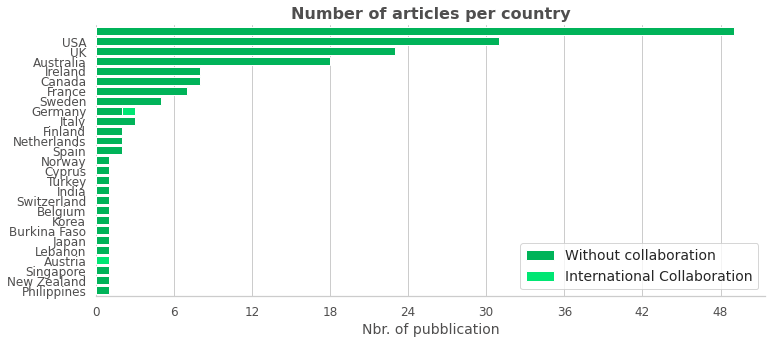

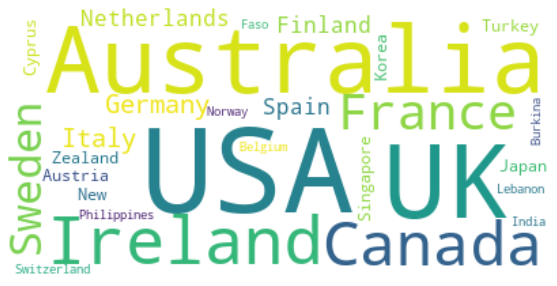

In [16]:
my_analysis.plot_countries(img_dir + 'countries.png', img_dir + 'countries_collab.png')
my_analysis.plot_wordclouds_countries(img_dir + 'wordclouds_countries.png')

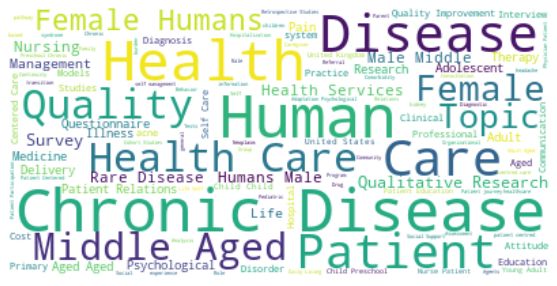

In [17]:
my_analysis.plot_pubkeys(img_dir + 'pubkeys.png')

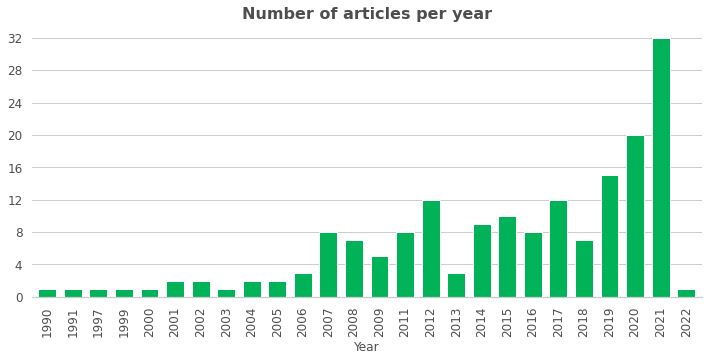

In [18]:
my_analysis.plot_years(img_dir + 'years.png')